In [1]:
"""
First, import the required Python dependencies.
"""
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt # module for plotting 
% matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [18]:
# Pandas Dataframe
df = pd.read_csv('E:/UPX_Project_Src/Flight_Data/data/flight_data.csv')

In [19]:
# Find variable thats needs to be taken care(either drop or fill). 
df.count()


year              336776
month             336776
day               336776
dep_time          328521
sched_dep_time    336776
dep_delay         328521
arr_time          328063
sched_arr_time    336776
arr_delay         327346
carrier           336776
flight            336776
tailnum           334264
origin            336776
dest              336776
air_time          327346
distance          336776
hour              336776
minute            336776
time_hour         336776
dtype: int64

In [20]:
df.loc[:, ["dep_delay"] ].describe()

,dep_delay
count,328521.000000
mean,12.639070
std,40.210061
min,-43.000000
25%,-5.000000
50%,-2.000000
75%,11.000000
max,1301.000000


In [21]:
# Convert df['time_hour'] from string to datetime
df['time_hour'] = pd.to_datetime(df['time_hour'])
# Descriptive statistics by group
# time_hour groupby origin(airports)
dep_peak_time = df[['time_hour']].groupby(df['origin']).describe()
dep_peak_time

time_hour
origin                            
EWR    count                120835
       unique                 6266
       top     2013-05-24 06:00:00
       freq                     38
       first   2013-01-01 05:00:00
       last    2013-12-31 23:00:00
JFK    count                111279
       unique                 6935
       top     2013-09-10 08:00:00
       freq                     35
       first   2013-01-01 05:00:00
       last    2013-12-31 23:00:00
LGA    count                104662
       unique                 6285
       top     2013-01-11 08:00:00
       freq                     31
       first   2013-01-01 05:00:00
       last    2013-12-31 21:00:00

In [22]:
# Descriptive statistics by group
# dep_delay & flight groupby origin(airports)
grp_dep = df[['dep_delay', 'flight']].groupby(df['origin']).describe()
grp_dep



dep_delay         flight
origin                                    
EWR    count  117596.000000  120835.000000
       mean       15.107954    2373.513833
       std        41.323704    1746.607017
       min       -25.000000       1.000000
       25%        -4.000000     807.000000
       50%        -1.000000    1637.000000
       75%        15.000000    4224.000000
       max      1126.000000    6181.000000
JFK    count  109416.000000  111279.000000
       mean       12.112159    1365.751004
       std        39.035071    1376.740626
       min       -43.000000       1.000000
       25%        -5.000000     235.000000
       50%        -1.000000     801.000000
       75%        10.000000    2100.500000
       max      1301.000000    5765.000000
LGA    count  101509.000000  104662.000000
       mean       10.346876    2152.773681
       std        39.993021    1558.321553
       min       -33.000000       1.000000
       25%        -6.000000     831.000000
       50%        -3.000000    1885.000000
       75%         7.000000    3404.000000
       max       911.000000    8500.000000

(array([  1.13242018e-06,   0.00000000e+00,   0.00000000e+00,
          1.13242018e-06,   2.26484036e-06,   1.13242018e-06,
          3.39726054e-06,   2.37808238e-05,   7.70045722e-05,
          2.16292254e-04,   1.20942475e-03,   5.91349817e-03,
          1.55888962e-02,   5.57648993e-02,   8.34118055e-02,
          6.43701602e-02,   1.61743574e-02,   1.66511063e-02,
          1.21055717e-02,   6.70505988e-03,   8.67886825e-03,
          7.33921518e-03,   4.10162589e-03,   5.69720592e-03,
          4.92149810e-03,   2.99185411e-03,   4.11634735e-03,
          3.66790896e-03,   2.27956182e-03,   2.98279475e-03,
          2.82652077e-03,   2.61249335e-03,   1.64200926e-03,
          2.21388145e-03,   2.13121478e-03,   1.26038366e-03,
          1.88208234e-03,   1.81526955e-03,   1.08712337e-03,
          1.57859373e-03,   1.44043847e-03,   9.41041168e-04,
          1.32606403e-03,   1.25132430e-03,   7.20219234e-04,
          1.12222840e-03,   1.04182656e-03,   9.97662177e-04,
        

(-50, 300)

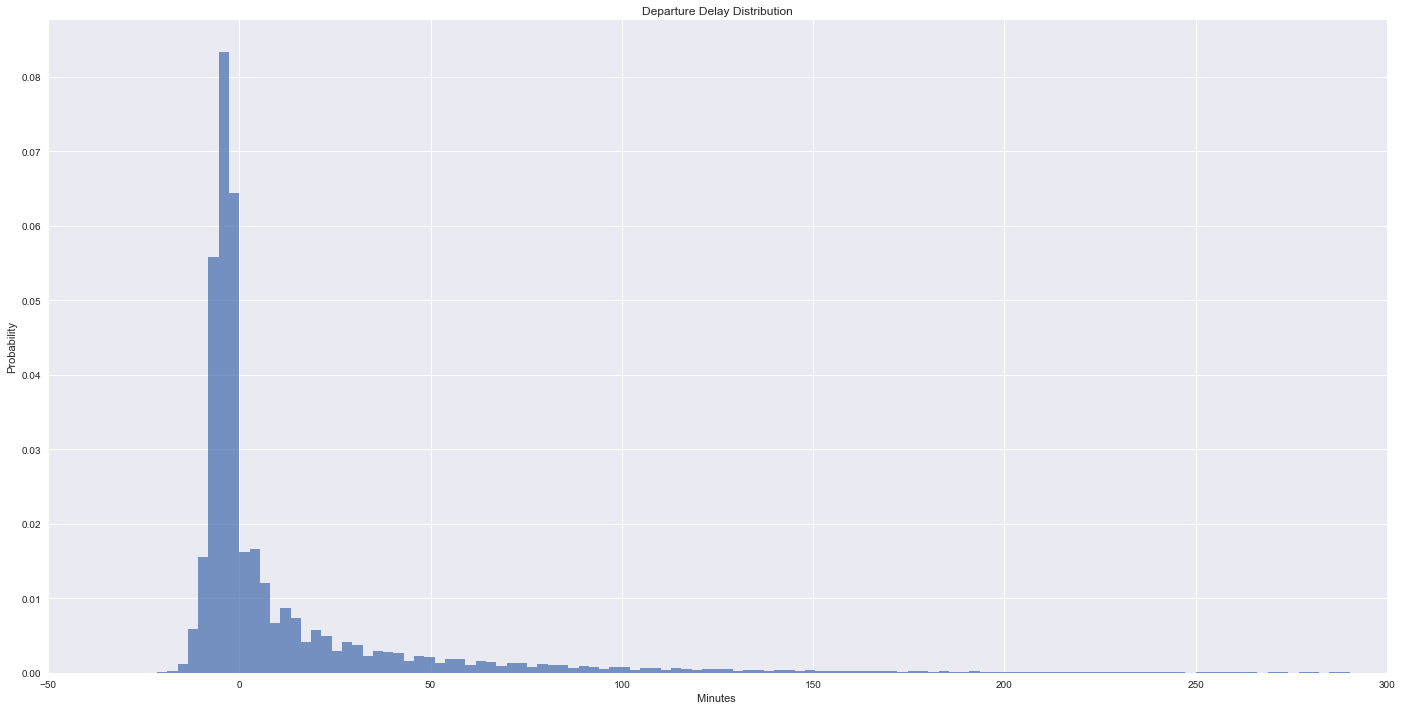

In [54]:
# plt departure delay distribution
plt.figure(figsize=(24, 12))
plt.hist(df.dep_delay.dropna(), bins = 500, normed=1, alpha=0.75)
plt.xlim(-50,300)
plt.xlabel('Minutes ')
plt.ylabel('Probability')
plt.title('Departure Delay Distribution')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

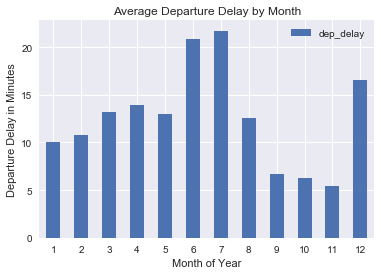

In [50]:
#departure delay w.r.t month
plt.figure(figsize=(12, 6))
df[['month','dep_delay']].groupby('month').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Month of Year')
plt.ylabel('Departure Delay in Minutes')
plt.title('Average Departure Delay by Month')

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

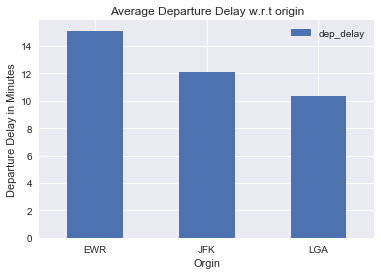

In [51]:
#departure delay w.r.t origin
plt.figure(figsize=(12, 6))
df[['origin','dep_delay']].groupby('origin').mean().plot(kind='bar')
plt.xticks(rotation=0)
plt.xlabel('Orgin')
plt.ylabel('Departure Delay in Minutes')
plt.title('Average Departure Delay w.r.t origin')